In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## LDA with extended data set to include other features than scores

In [2]:
class MF():
    
    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.
        
        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
        
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice

        self.P = np.random.normal(scale=1.0/self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1.0/self.K, size=(self.num_items, self.K))

      
        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])
        print()
        print("Overall Bias")
        print(self.b)
        
        # Create a list of training samples from the cells with ratings. Record structure i,j,rating e.g. 5,6,10
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
              for j in range(self.num_items)
                  if self.R[i, j] > 0]
     
        # Perform stochastic gradient descent for number of iterations
       
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            print()
            if (i+1) % 10 == 0:
               print("Iteration: %d ; error = %.4f" % (i+1, mse))
        
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
 
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)

            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
 
            self.P[i, :] += (self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:]))
            self.Q[j, :] += (self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:]))
    

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction
    
    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [4]:
df_1  = pd.read_csv("Customer_Product_Matrix_revised.csv")
df_1

,Digital Oilfield,Industrial Robotics,3D Printing,Electric Cars,Bicycles,Solar power generators,Home energy management system,solar-powered speakers,energy-conservation software,Solar-powered Amazon Kindle
0,0,0,0,0,0,4,0,0,0,0
1,0,0,0,0,0,5,0,0,0,5
2,0,0,0,0,0,0,0,4,0,0
3,0,0,0,0,3,0,0,5,0,4
4,0,0,0,0,0,0,5,0,0,0
5,0,0,0,0,0,4,5,0,0,0
6,0,3,0,4,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,5,0
8,3,0,0,5,0,0,0,0,0,0
9,0,0,0,0,0,0,0,5,0,0


In [5]:
R=np.array(df_1 , dtype='int')


In [24]:

mf = MF(R, K=7, alpha=0.1, beta=0.1, iterations=50)
training_process = mf.train()
print("Actual Ratings = ")
print(R)
print()
print("Predicted Ratings = ")
print( mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T))


()
Overall Bias
4.28888888889
()
()
()
()
()
()
()
()
()
()
Iteration: 10 ; error = 2.5431
()
()
()
()
()
()
()
()
()
()
Iteration: 20 ; error = 1.9634
()
()
()
()
()
()
()
()
()
()
Iteration: 30 ; error = 1.6929
()
()
()
()
()
()
()
()
()
()
Iteration: 40 ; error = 1.5164
()
()
()
()
()
()
()
()
()
()
Iteration: 50 ; error = 1.4660
Actual Ratings = 
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 5]
 [0 0 0 ..., 4 0 0]
 ..., 
 [0 0 4 ..., 0 0 0]
 [0 0 0 ..., 0 5 0]
 [3 0 0 ..., 0 5 0]]
()
Predicted Ratings = 
[[ 2.81999185  3.27902042  3.28526034 ...,  4.0723022   4.04317535
   4.17333488]
 [ 3.78595888  4.11700521  4.12776097 ...,  4.96238582  4.78113959
   4.9655751 ]
 [ 3.00688667  3.30074743  3.46967763 ...,  4.06124406  4.06968146
   4.30894206]
 ..., 
 [ 3.52760867  3.84672643  3.98257305 ...,  4.69022839  4.6994511
   4.80746145]
 [ 3.82809095  4.08948967  4.23854956 ...,  4.96270263  4.96102639
   5.02833806]
 [ 3.21877883  3.50874157  3.69887705 ...,  4.48869545  4.7305555
   4.42314887

In [25]:
training_process_df = pd.DataFrame(training_process)

In [26]:
x = np.array(training_process_df[0])
y = np.array(training_process_df[1])

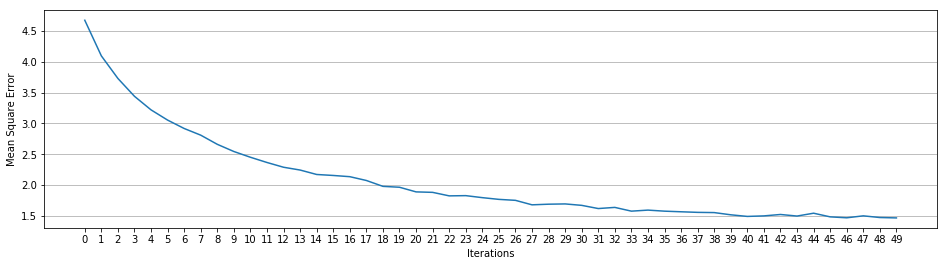

In [27]:
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")